In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_dataset = train_datagen.flow_from_directory('dataset/train',
                                                  target_size=(200, 200), 
                                                  class_mode='categorical',
                                                  color_mode='grayscale', 
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory('dataset/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                batch_size=100,
                                                color_mode='grayscale', 
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  color_mode='grayscale', 
                                                  batch_size=100,
                                                  )

Found 3600 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense

In [3]:
print(train_dataset.image_shape)

(200, 200, 1)


In [4]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

'''model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))'''

'''model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))'''

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


'''model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))'''

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))


model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [5]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [6]:
Info = model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=2,
                 )

Epoch 1/2
36/36 [==============================] - 126s 3s/step - loss: 0.8178 - accuracy: 0.6978 - precision: 0.8341 - recall: 0.5586 - val_loss: 0.2034 - val_accuracy: 0.9308 - val_precision: 0.9383 - val_recall: 0.9250
Epoch 2/2
36/36 [==============================] - 117s 3s/step - loss: 0.0894 - accuracy: 0.9708 - precision: 0.9735 - recall: 0.9686 - val_loss: 0.0713 - val_accuracy: 0.9783 - val_precision: 0.9799 - val_recall: 0.9775


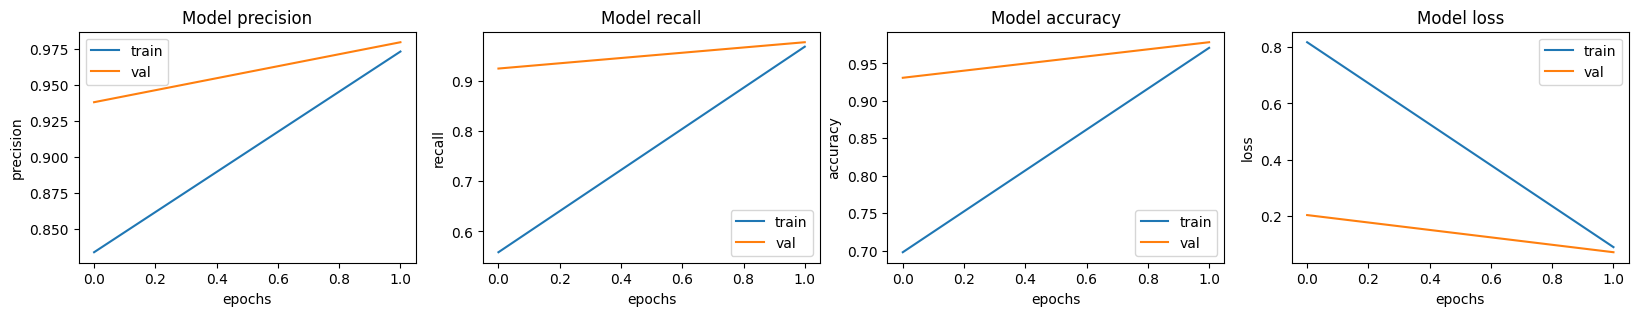

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [8]:
predictions = model.predict(test_dataset)

12/12 [==============================] - 7s 597ms/step


In [9]:
labels = []

for key, value in train_dataset.class_indices.items():
   labels.append(key)

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

In [11]:
evaluate(test_dataset.classes,predictions)

Accuracy: 0.9783333333333334
Precision: 0.9784136486835958
Recall: 0.9783333333333333
F1_score: 0.9783200835921942


In [12]:
# Saving the model
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model-bw.h5')
print('Weights saved')
model.save('model-bw1.h5')
print('Model saved')

Model Saved
Weights saved
Model saved
